In [17]:

## first run 
##pip install h5py==2.8.0
##pip install tensorflow==1.5.0 (I'm not kidding)



from keras.layers import Dense,Dropout, Activation, Flatten, Conv3D, MaxPooling3D 
#from keras.regularizers import Regularizer
from keras.regularizers import l1, l2, l1_l2
from keras.models import Sequential
from keras.optimizers import Adadelta
from keras.models import load_model

import os
import h5py

In [109]:

def create_model(model_para = [6, 12, 18, 18, 64, 0.01, 0.4,(5, 5, 5)],foldname = os.path.abspath('.') ):
    # input image dimensions
    
    #img_rows, img_cols, img_depth = 49,39,38
    # number of convolutional filters to use
    conv_l2 = 0.008
    
    full_l2  = 0.3
    # convolution kernel size
    kernel_size = (3,3,3)
    # size of pooling area for max pooling
    pool_size = (2, 2, 2)

    drop_out = (model_para[5], model_para[6])
    
    act_function = 'tanh'
    
    full_connect = model_para[4]
    
    nb_filters = (model_para[0], model_para[1], model_para[2], model_para[3])
#    nb_filters = (5, 10, 15, 15)
    l1_regularizer = 0.01
    
    l2_regularizer = full_l2
    
    nb_classes = 2
    
    #input_shape = (1, 40, 48, 48)
    input_shape = (40, 48, 48, 1)
    
    #wr = WeightRegularizer(l1=l1_regularizer,l2=l2_regularizer)
    kr = l1_l2(l1=l1_regularizer, l2=l2_regularizer)
    
    
    
    #create cnn model
    model = Sequential()
    
    
    #keras.layers.Conv3D(filters, kernel_size, strides=(1, 1, 1), padding='valid', 
    #data_format=None, dilation_rate=(1, 1, 1), activation=None, use_bias=True, 
    #kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, 
    #bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
   
    #model.add(Conv3D(filters = 1,kernel_size = 3, strides = 1, activation = 'tanh', input_shape = (50, 41, 40, 1)))
    
    # need to specify data_format='channels_first' 
    
    model.add(Conv3D(nb_filters[0], kernel_size[0], kernel_size[1],kernel_size[2],W_regularizer = l2(conv_l2),
                                activation = act_function , input_shape=input_shape, data_format='channels_last'))
    
    model.add(MaxPooling3D(pool_size=pool_size)) 
    
    model.add(Dropout(drop_out[0]))

    model.add(Conv3D(nb_filters[1], kernel_size[0], kernel_size[1], kernel_size[2],W_regularizer = l2(conv_l2),
                                   activation = act_function))
    
    model.add(MaxPooling3D(pool_size=pool_size))
    
    model.add(Dropout(drop_out[0]))
    
    model.add(Conv3D(nb_filters[2], kernel_size[0], kernel_size[1], kernel_size[2],W_regularizer = l2(conv_l2),
                                    activation = act_function))  
    
    model.add(MaxPooling3D(pool_size=pool_size))    

    model.add(Dropout(drop_out[0]))
    
    
    model.add(Conv3D(nb_filters[3], kernel_size[0], kernel_size[1], kernel_size[2],W_regularizer = l2(conv_l2),
                            activation = act_function))
    #model.add(MaxPooling3D(pool_size=pool_size))    

    model.add(Dropout(drop_out[1]/2))

    model.add(Flatten())
    
    #model.add(Dense(full_connect, W_regularizer = wr,activation = act_function))

    model.add(Dropout(drop_out[1]))
    
    model.add(Dense(nb_classes,activation = act_function))
    
    
    
    model.add(Activation('softmax'))
    #model.add(Activation(act_function))
    model.summary()

    ADA = Adadelta(lr = 2.0, rho=0.95)

    model.compile(loss= 'categorical_crossentropy',
              optimizer= ADA,
              metrics=['accuracy'])

    

##    save parameters of cnn model to .txt             
    sname = 'model_parameter.txt'
    full_namem = os.path.join(foldname,sname)
    fm = open(full_namem,'w')
    fm.write('************CNN model parameter************ '+'\n')
    fm.write('Number of Convolution layer :     '+str(len(nb_filters))+'\n')
    fm.write('Input shape :                     '+str(input_shape)+'\n')
    fm.write('Number of kernal per layer ï¼?    '+str(nb_filters)+'\n')
    fm.write('Kernel size per layer :           '+str(kernel_size)+'\n')
    fm.write('Pool size per layer :             '+str(pool_size)+'\n')
    fm.write('Activation function per layer :   '+act_function+'\n')
#    fm.write('Dropout rate :                    '+str(drop_out)+'\n')
    fm.write('Number of full-connect layer :    '+str(full_connect)+'\n')
    fm.write('Coefficient of L1 regularizer :   '+str(l1_regularizer)+'\n')
    fm.write('Coefficient of L2 regularizer :   '+str(l2_regularizer)+'\n')
    fm.write('Output :                          '+str(nb_classes)+' classes'+'\n')
    fm.close()

    return model
    

NameError: name 'os' is not defined

In [110]:
model = create_model()


#save weights for initialization

for ii in range(27):
    #weights_file_path = "C:\\Users\\Reid\\Desktop\\dataSciPrinciples\\finalProj\\Alz-Finders\\models\\model_weights\\saved_weights_" + str(ii) + ".h5"
    weights_file_path = os.getcwd() + "\\model_weights\\saved_weights_net_" + str(ii) + "_epoch_0.h5"
    
    model.save(weights_file_path)
    del model 
    model = load_model(weights_file_path)
    
#model.summary()


NameError: name 'create_model' is not defined

In [111]:
#for visualizing
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

#adni_file_path = os.getcwd() + "\\..\\..\\ADNI\\AD\\036_S_1001\\2006-11-20_09_21_45.0.nii.gz"


#img = nib.load(adni_file_path)
#img_data = img.get_fdata()

if 0:
    def show_slices(slices):
        """ Function to display row of image slices """
        fig, axes = plt.subplots(1, len(slices))
        for i, slice in enumerate(slices):
            axes[i].imshow(slice.T, cmap="gray", origin="lower")


    slice_0 = img_data[50, :, :]
    slice_1 = img_data[80, :, :]
    slice_2 = img_data[100, :, :]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle("first dimension slices")  
    plt.show()

    #so the first dimension slices from your right ear to your left ear


    slice_0 = img_data[:, 20, :]
    slice_1 = img_data[:, 25, :]
    slice_2 = img_data[:, 35, :]
    slice_3 = img_data[:, 45, :]
    slice_4 = img_data[:, 50, :]
    slice_5 = img_data[:, 55, :]
    slice_6 = img_data[:, 60, :]
    slice_7 = img_data[:, 70, :]
    slice_8 = img_data[:, 75, :]
    slice_9 = img_data[:, 80, :]
    slice_10 = img_data[:, 85, :]
    slice_11 = img_data[:, 90, :]



    show_slices([slice_0, slice_1, slice_2, slice_3])
    plt.suptitle("second dimension slices")  
    plt.show()


    show_slices([slice_4, slice_5, slice_6, slice_7])
    plt.suptitle("second dimension slices")  
    plt.show()


    show_slices([slice_8, slice_9, slice_10, slice_11])
    plt.suptitle("second dimension slices")  
    plt.show()

    #so the second dimension slices from the back of the head to the front of the head




    slice_0 = img_data[:, :, 20]
    slice_1 = img_data[:, :, 30]
    slice_2 = img_data[:, :, 40]
    slice_3 = img_data[:, :, 50]
    slice_4 = img_data[:, :, 60]
    slice_5 = img_data[:, :, 70]
    slice_6 = img_data[:, :, 80]
    slice_7 = img_data[:, :, 90]
    slice_8 = img_data[:, :, 100]
    slice_9 = img_data[:, :, 110]
    slice_10 = img_data[:, :, 120]
    slice_11 = img_data[:, :, 130]


    show_slices([slice_0, slice_1, slice_2, slice_3])
    plt.suptitle("third dimension slices")  
    plt.show()


    show_slices([slice_4, slice_5, slice_6, slice_7])
    plt.suptitle("third dimension slices")  
    plt.show()


    show_slices([slice_8, slice_9, slice_10, slice_11])
    plt.suptitle("third dimension slices")  
    plt.show()



    #so the third dimension slices horizontally from bottom of the brain up



ImportError: No module named nibabel

In [112]:
# do the file traversal
# do the downsample
# do the fit

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


#C:\Users\Reid\Desktop\dataSciPrinciples\finalProj\ADNI_Preproc\ADNI\AD\036_S_1001\2006-11-20_09_21_45.0.nii


#img = nib.load(adni_file_path)
#img_data = img.get_fdata()

#print(img.shape)
#print(type(img))
#img_np = np.array(img.dataobj)
#print(img_np.shape)
#print(type(img_np))


#img_np_ds = img_np[::2,::2,::2]
#print(img_np_ds.shape)

def get_patch(input_3D, patch_idx):
    if (patch_idx < 0 | patch_idx > 26):
        print("You have passed an incorrect patch index to get patch: "+ str(patch_idx))
    dim1_start_idxs = [0, 20, 40] 
    dim1_end_idxs =[40, 60, 80]
    dim2_start_idxs = [0, 24, 48] 
    dim2_end_idxs =[48, 72, 96]
    dim3_start_idxs = [0, 24, 48]
    dim3_end_idxs = [48, 72, 96]
    ii = int(patch_idx / 9)
    jj = int( (patch_idx %9)  / 3)
    kk = int(patch_idx % 3)
    return input_3D[dim1_start_idxs[ii]:dim1_end_idxs[ii],dim2_start_idxs[jj]:dim2_end_idxs[jj],dim3_start_idxs[kk]:dim3_end_idxs[kk]]


def get_sampleXY(path, patch_idx):
    img = nib.load(path)
    img_data = img.get_fdata()
    img_np = np.array(img.dataobj)
    img_np_ds = img_np[::2,::2,::2]
    x = get_patch(img_np_ds, patch_idx)
    #(batches, x, y, z, channels)
    x = x.reshape((1, 40, 48, 48, 1))
    isAD = "\\AD\\" in path
    y = np.array([[int(isAD), 1-int(isAD)]])
    return x, y
    
    



#patch_0 = get_patch(img_np_ds, 0)
#patch_0 = patch_0.reshape((1, 40, 48, 48, 1))
#print(patch_0.shape)

#patch_label = np.array([[1,0]])
#print(patch_label)
#print(patch_label.shape)
#result = model.predict(patch_0)


#sample_x, sample_y = get_sampleXY(adni_file_path, 0)

#model.fit(x=sample_x, y=sample_y, epochs=25) 
#model.fit(x= sample_x, y=sample_y, epochs=1)

#result = model.predict(sample_x)

#print(result)



ImportError: No module named nibabel

In [113]:
def get_ad_nii_IDs():
    ad_nii_ids = []
    patients_path = os.getcwd() + "\\..\\..\\ADNI\\AD\\" 
    for patient_folder in os.listdir(patients_path):
        nii_path = os.path.join(patients_path, patient_folder)
        for nii in os.listdir(nii_path):
            file_path = os.path.join(nii_path, nii)
            ad_nii_ids.append(file_path)
    #print(len(ad_nii_ids))
    #print(ad_nii_ids)
    return ad_nii_ids
    
ad_nii_IDs = get_ad_nii_IDs()    
#print(len(ad_nii_IDs))
#print(ad_nii_IDs)


def get_nc_nii_IDs():
    nc_nii_ids = []
    patients_path = os.getcwd() + "\\..\\..\\ADNI\\CN\\" 
    for patient_folder in os.listdir(patients_path):
        nii_path = os.path.join(patients_path, patient_folder)
        for nii in os.listdir(nii_path):
            file_path = os.path.join(nii_path, nii)
            nc_nii_ids.append(file_path)
    #print(len(ad_nii_ids))
    #print(ad_nii_ids)
    return nc_nii_ids

nc_nii_IDs = get_nc_nii_IDs()    
#print(len(nc_nii_IDs))
#print(nc_nii_IDs)

#list(set(ad_nii_IDs).intersection(set(nc_nii_IDs)))


def create_train_test_split_nii_ids(ad_nii_IDs, nc_nii_IDs):
    ad_randVec = np.random.rand( len(ad_nii_IDs), 1) 
    #decide 80% for training, 20% for testing

    #print(type(train_indices))
    #print(len(train_indices))
    #print(train_indices[0])
    #print(train_indices[1])
    
    ad_train_indices = np.where(ad_randVec < 0.8)[0]
    ad_test_indices = np.where(ad_randVec >= 0.8)[0]
    
    nc_randVec = np.random.rand(len(nc_nii_IDs), 1) 
    
    nc_train_indices = np.where(nc_randVec < 0.8)[0]
    nc_test_indices = np.where(nc_randVec >= 0.8)[0]
    
    train_ad_IDs= []
    train_nc_IDs= []
    test_ad_IDs= []
    test_nc_IDs= []
    
    for index in ad_train_indices:
        train_ad_IDs.append(ad_nii_IDs[index])
    
    for index in nc_train_indices:
        train_nc_IDs.append(nc_nii_IDs[index])
    
    for index in ad_test_indices:
        test_ad_IDs.append(ad_nii_IDs[index])
    
    for index in nc_test_indices:
        test_nc_IDs.append(nc_nii_IDs[index])
        
        
    train_IDs = {'AD':train_ad_IDs, 'NC': train_nc_IDs }
    test_IDs = {'AD':test_ad_IDs, 'NC': test_nc_IDs }
    
    return train_IDs, test_IDs





OSError: [Errno 2] No such file or directory: '/Users/brycefuller/Documents/College/EE 461P/Final Project/Alz-Finders\\..\\..\\ADNI\\AD\\'

## I'd like to thank the academy ...

# BEGIN TRAINING

In [24]:

## very important: don't uncomment this line unless you want to lose the current train/test split
train_IDs, test_IDs = create_train_test_split_nii_ids(get_ad_nii_IDs(), get_nc_nii_IDs())

print("train_IDs: ")
print(train_IDs)

print("test_IDs: ")
print(test_IDs)



train_IDs: 
{'AD': ['C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\003_S_1059\\2006-11-09_17_28_06.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\003_S_1257\\2007-03-01_10_20_36.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\010_S_0829\\2007-02-08_14_25_09.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\010_S_0829\\2007-02-08_14_33_41.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0003\\2005-09-01_10_33_55.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0003\\2006-09-12_12_24_48.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0003\\2007-09-12_12_48_32.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0010\\2006-11-09_12_01_54.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0010\\2007-11-07_12_23_57.0

In [39]:
import random

#print(train_IDs)

for epoch_number in range(6, 100):
    print("****EPOCH NUMBER " + str(epoch_number) + "****")
#epoch_number = epoch_number + 1
    all_training_IDs = train_IDs['AD'] + train_IDs['NC']
    random.shuffle(all_training_IDs)
    for neural_net_idx in range(27):
        print("NOW TRAINING NET NUMBER " + str(neural_net_idx))
        model = load_model(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_" + str(epoch_number-1) + ".h5")
        #samples_path = os.getcwd() + "\\..\\..\\ADNI\\AD\\"
        for nii_path in all_training_IDs:
            print("NOW TRAINING NET NUMBER " + str(neural_net_idx))
            x, y = get_sampleXY(nii_path, patch_idx=neural_net_idx) ## one brain patch == one datum == one example
            print(nii_path)
            model.fit(x=x, y=y);
        model.save(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_" + str(epoch_number) + ".h5")
            
            



****EPOCH NUMBER 6****
NOW TRAINING NET NUMBER 0
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 585ms/step - loss: 0.7649 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4504 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2471 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0181 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_01

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8929 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7587 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7558 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7455 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7531 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7478 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7592 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7477 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [====

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.7320 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.6980 - acc: 1.0000
NOW TRAINING NET NUMBER 1
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 559ms/step - loss: 0.7269 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.7267 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==========

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 1.1340 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.7286 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.7119 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.7279 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6760 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7314 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7258 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7088 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0739 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5083 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8232 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 540ms/step - loss: 0.7602 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0253 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7472 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7489 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7519 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7450 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7036 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7393 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7428 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7170 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.6537 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7351 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7502 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7100 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7060 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7105 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7086 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [===========

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7057 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7057 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6705 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7235 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0236 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6852 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7175 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4177 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5236 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7368 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3504 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7483 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7613 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7586 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7519 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1


C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4351 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7264 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5049 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7734 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 2.1078 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6831 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7343 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7215 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================]

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1892 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7214 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7051 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7214 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4699 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7165 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7170 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7212 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9029 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6164 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4888 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4008 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4716 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5198 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8348 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2677 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1764 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0681 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6108 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6883 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6378 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7300 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7281 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7028 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [===========

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2945 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7434 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8507 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6676 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7168 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7561 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7231 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7343 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6613 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2438 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4861 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2020 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5337 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5562 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0683 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7492 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7348 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7310 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7302 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7322 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==========================

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1882 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2167 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0284 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 2.0943 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7007 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7105 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1937 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1785 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7280 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7296 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7380 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8151 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8174 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9642 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8189 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7313 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2208 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5966 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7341 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6983 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7189 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7122 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7123 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6622 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7287 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7330 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8128 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7263 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7207 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6218 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7633 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7215 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7152 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7333 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7121 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7151 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7351 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3231 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7691 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7014 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7451 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7601 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1836 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7417 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [=====================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7317 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7370 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7330 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5477 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3988 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3153 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7303 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7700 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [=========================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1901 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7549 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.4138 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1594 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7455 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7385 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5215 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7648 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6603 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6169 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 1.9815 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1996 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4484 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2159 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6848 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1778 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5940 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7477 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2153 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1947 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.4714 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4627 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3811 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.3104 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0145 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6875 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7046 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8225 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6209 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.6660 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6840 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5855 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8065 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7338 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7414 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7400 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9191 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2666 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2376 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5264 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2798 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6044 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8216 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7645 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0786 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7466 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8211 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7289 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3181 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7690 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3356 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7114 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7396 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7187 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7940 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7341 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7537 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7423 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6758 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7571 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7423 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7394 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7433 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7997 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6632 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5795 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8478 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3689 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 19
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 727ms/step - loss: 0.7506 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5665 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7493 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0489 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_0

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1037 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1468 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3812 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.1874 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9048 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7471 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7267 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3041 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1


NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8593 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6565 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7385 - acc: 1.0000
NOW TRAINING NET NUMBER 20
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 696ms/step - loss: 1.7914 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5150 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4720 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7367 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2166 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7444 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7655 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7285 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7296 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7246 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7242 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7242 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7668 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5821 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5444 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6510 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2606 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7448 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9099 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7450 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6890 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4513 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7625 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7385 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7434 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6706 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2088 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6964 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7401 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7226 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7249 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3722 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7203 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7227 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.4375 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5926 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7417 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6150 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2809 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1531 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1059 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1806 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2318 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1813 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1588 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2362 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6848 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4052 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.9876 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0819 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3870 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4573 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4438 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8100 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4627 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8602 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6678 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8572 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4899 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6989 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8157 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7075 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7557 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7418 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7167 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7197 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7369 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7332 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7333 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7294 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7362 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7848 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5449 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5478 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1394 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7897 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8922 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3154 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7427 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3877 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.6517 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==========================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5742 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7384 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7349 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7199 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7364 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7282 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4847 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7441 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7351 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7378 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7434 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7179 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7091 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7723 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8673 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7613 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7550 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9260 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7154 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4345 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8899 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7102 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5113 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4449 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5911 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4583 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2561 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4103 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7203 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7380 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7340 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7392 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6738 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5280 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6725 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3595 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [===========

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8781 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7191 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7159 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3783 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7173 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7137 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2387 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4186 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7126 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5317 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7185 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7162 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7653 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7212 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7160 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6093 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6054 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8127 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4740 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7122 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7271 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7799 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6038 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7230 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7222 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6829 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7946 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6921 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7144 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6897 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7145 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6600 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6862 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7137 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7024 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7983 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9440 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6590 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5898 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4567 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6197 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4122 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5343 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5937 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7721 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6423 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7679 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3840 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3366 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7339 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3430 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7634 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8105 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7330 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7415 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7224 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7321 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7259 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7268 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7206 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7330 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7088 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8444 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7337 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8561 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7282 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7264 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6892 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2517 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6755 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7225 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7181 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7217 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7758 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7536 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7754 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7266 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7264 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5754 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7230 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7219 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7225 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7209 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7143 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7148 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7141 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7659 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 10
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 868ms/step - loss: 0.6845 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6602 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7270 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6751 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_4

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0300 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3364 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3637 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.3929 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7275 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8568 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7449 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2616 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7193 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1380 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2750 - acc: 1.0000
NOW TRAINING NET NUMBER 11
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 884ms/step - loss: 0.7201 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7283 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7283 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6892 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6460 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2994 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7170 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7823 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7246 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7143 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7146 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7148 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7284 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6681 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7256 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7266 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7203 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5964 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7165 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7351 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7090 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7256 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7321 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6140 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3636 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6864 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4414 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3201 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4087 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7428 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6507 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0635 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7277 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3173 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6222 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1961 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7814 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6983 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7255 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7277 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7255 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7218 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0097 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7489 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7347 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6720 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4974 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6886 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4589 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5779 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7112 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6242 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8381 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9996 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0269 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7615 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [=================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9914 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3103 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9462 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3067 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7095 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6838 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4494 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6709 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7271 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7251 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7428 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7322 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7260 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7226 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6477 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7392 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7029 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7319 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5825 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7299 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7572 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7166 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7761 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7334 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0084 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8395 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7324 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7291 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [=================

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7318 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7532 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5581 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7346 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6376 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7366 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2945 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4614 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7443 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3530 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7428 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6451 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5783 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7444 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5262 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7787 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6966 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7282 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7967 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7284 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7012 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7159 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7895 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7316 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6792 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8213 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7171 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7217 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7214 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7209 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7250 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7208 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7306 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7166 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7207 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6994 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7372 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.7613 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7961 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7350 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4010 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6304 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7406 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7242 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7268 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7273 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7451 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4643 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1425 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9572 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2177 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1577 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7008 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7203 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7223 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7214 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7182 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7844 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7183 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7194 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 0.2820 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8334 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8923 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1943 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2054 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9882 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8805 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7047 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4028 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0222 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8071 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2203 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7464 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8109 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8184 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8783 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2887 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8704 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5544 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0734 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4189 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7819 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0345 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8775 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6627 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9640 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7029 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7244 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7099 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7243 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7326 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7313 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7902 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7228 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4853 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7203 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7724 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7220 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7751 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7854 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5519 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7605 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7324 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7834 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5406 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2022 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9351 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8326 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8701 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4524 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7226 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7394 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7431 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7200 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7105 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7161 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7245 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7369 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7244 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8487 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7236 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7295 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7536 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3957 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7166 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6644 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3737 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3957 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.7965 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5671 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8490 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0028 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7455 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8931 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6009 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7244 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7330 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7117 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7210 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7238 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0393 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7249 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7233 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2929 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8349 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7262 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7276 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7132 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7099 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 1.0789 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7087 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [====

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7056 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6958 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7078 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7089 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6988 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7044 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6613 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7084 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7285 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7150 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7147 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7140 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7322 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6010 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6416 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5213 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7711 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7083 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6156 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7116 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7277 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9078 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7137 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0130 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7106 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7173 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7486 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7120 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6527 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7165 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5443 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7082 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6228 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4684 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3524 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.7880 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4390 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7576 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.5946 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1908 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [====

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6593 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.3881 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7256 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4489 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [============

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7228 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7171 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7169 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.6980 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7175 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7217 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8277 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7154 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4027 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7144 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7321 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7237 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7216 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7226 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7307 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7172 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6048 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7061 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7151 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2726 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0690 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7190 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7260 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7173 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5959 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9102 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7135 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7408 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7110 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6705 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8538 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6805 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4766 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4073 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0952 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6316 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.9933 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7619 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5772 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2855 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.7231 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1


NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5039 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2229 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0385 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7412 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6365 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8224 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7086 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7162 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7195 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7106 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7670 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6968 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9348 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7027 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7612 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4538 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7074 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7240 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7181 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6808 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7977 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7156 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4540 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7129 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7163 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7334 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7274 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7059 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8576 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6383 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2643 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5742 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1988 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7291 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8254 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5672 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9417 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7265 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7299 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4407 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7467 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 0.7645 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7635 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6628 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2336 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1484 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2304 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1352 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7255 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4944 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7103 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7473 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7261 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7338 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7216 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7463 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5593 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2785 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2642 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3495 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0154 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6188 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4855 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.2818 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5721 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.5690 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3143 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4504 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6871 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7166 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7318 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7195 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7140 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6040 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7701 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7183 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7090 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3919 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7045 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7632 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3691 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.9125 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8556 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9198 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8531 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6486 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1924 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1148 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7179 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7008 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7223 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7248 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7184 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7167 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0290 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7304 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7216 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7244 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6899 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5300 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7334 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3211 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6999 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7924 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7307 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7220 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6830 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3641 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7356 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7058 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7225 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7201 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7167 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7648 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7237 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7146 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7151 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6383 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0128 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7146 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7237 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6865 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7004 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7127 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6998 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7118 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7210 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4163 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7335 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8397 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5492 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7262 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7373 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4771 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8363 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5217 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4266 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1731 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9729 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6890 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7111 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7139 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7226 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8659 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7117 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7341 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6621 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7050 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7059 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6786 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7046 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1823 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8674 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3646 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9991 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4728 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0125 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0868 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.9212 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7767 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6368 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7269 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7179 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5908 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1244 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7239 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5710 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0057 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5209 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2655 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3809 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6025 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9275 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3072 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1154 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7222 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7251 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7213 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7197 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7270 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7335 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4809 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7207 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6361 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 0us/step - loss: 0.6923 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6857 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7362 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7879 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9935 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2475 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7179 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7107 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6530 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.7081 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9898 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7012 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7264 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7119 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7106 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 1.8903 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7327 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6492 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7695 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [=

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7193 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7219 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6616 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7231 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7415 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7197 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7124 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7253 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7153 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7665 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 1.3103 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7167 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [=

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4510 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7057 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3344 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6874 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7342 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7495 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7111 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7118 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7108 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7043 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7069 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7620 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5708 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7198 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7177 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7823 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7173 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7183 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7184 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7194 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7183 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7410 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7182 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7182 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6718 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8085 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7254 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7200 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7163 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7196 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7192 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7190 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [===========

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7130 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7727 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6986 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7064 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7237 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5393 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6649 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6533 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2757 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6184 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9412 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6937 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0197 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7133 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6980 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4377 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7117 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8509 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7104 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7305 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6768 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8212 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7191 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7094 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6092 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5653 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1706 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1518 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2692 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3540 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8208 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3227 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6149 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3043 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5929 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8780 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5333 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2936 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.7624 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3537 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7035 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6500 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5789 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9812 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7101 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6600 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7041 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7202 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7198 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7227 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7196 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6232 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7200 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7113 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7194 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6790 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9143 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6958 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7324 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6912 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7077 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7086 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7500 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7155 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7404 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6771 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8993 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7623 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7135 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7198 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6306 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7124 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7361 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7090 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7039 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6795 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6429 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7143 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8414 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7158 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6614 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7136 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6496 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6288 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8810 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0276 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4594 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7004 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6394 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0125 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6828 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7069 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8124 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6218 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7135 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3683 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6880 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7140 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7039 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7124 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7469 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6423 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7160 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0176 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4564 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0295 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7293 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7145 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7013 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6993 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7228 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7230 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7155 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6651 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7199 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7168 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7171 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7198 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7164 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7140 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8802 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1581 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7314 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6502 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6346 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7051 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3393 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6884 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7117 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6274 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6922 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7463 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9114 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5126 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6371 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7017 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1625 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5566 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5238 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0982 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3995 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4054 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4003 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6565 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7155 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7157 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7165 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8154 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7185 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7118 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7115 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7008 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7142 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1361 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7055 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7220 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7216 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7208 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7190 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7156 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6767 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7227 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7164 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2955 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7294 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7134 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7143 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5357 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2865 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8087 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7172 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7157 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7063 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6520 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2271 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6919 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7163 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7203 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.5561 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7055 - acc: 1.0000
NOW TRAINING NET NUMBER 19
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 0.7116 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7114 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7117 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3211 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7051 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7113 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7042 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6255 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6874 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7338 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7075 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8209 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.8140 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7507 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5690 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6786 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7162 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7164 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7192 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1856 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6343 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7307 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7114 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7202 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7457 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7440 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7449 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7234 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7205 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5086 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7000 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9601 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8403 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1280 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7233 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7684 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7225 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7203 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0468 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7753 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7115 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7237 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9242 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7121 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7073 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7266 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8691 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7324 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7081 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6853 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7659 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7536 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6016 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9846 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.6036 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7862 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8406 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.7657 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7258 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7110 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7108 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6068 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1995 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.4312 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3768 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1629 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5367 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5221 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8059 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2747 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3796 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2436 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6578 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.6460 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.7336 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.8084 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.6747 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.9001 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.7156 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.7243 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.9780 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7055 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7161 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7175 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7406 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7162 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7166 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2321 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7129 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2566 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7695 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1909 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3419 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7097 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7216 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6745 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7290 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7123 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7264 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7303 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7084 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6763 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7095 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7104 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7212 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7077 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7048 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7056 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6466 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7080 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7006 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5420 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8468 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6281 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7197 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7039 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7066 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7048 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6788 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7150 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6985 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7369 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7168 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7291 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7150 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7129 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7121 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7119 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1


NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7117 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7126 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9801 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7119 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1


C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7270 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7727 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7143 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7582 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5321 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7395 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7262 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6965 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7081 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6900 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7188 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.7095 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7795 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8442 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6092 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7119 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6788 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7091 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7085 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7087 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7068 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7082 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5243 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6591 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8663 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6347 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6811 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0646 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7033 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7089 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7168 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7396 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2304 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7247 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [=========================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5144 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8439 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5313 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3348 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7101 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9544 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7172 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3364 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1881 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2461 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9766 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1257 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6388 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7183 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7135 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7173 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7138 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7135 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6534 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7027 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7268 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7295 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7549 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1


C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5422 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5497 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7059 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.4449 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7260 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7089 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7122 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7085 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7075 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7285 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7056 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7182 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.7201 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7128 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7202 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7133 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7168 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8182 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7116 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7104 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7102 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7026 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7051 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7181 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7111 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7158 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1913 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7321 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6236 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7060 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4937 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6810 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2787 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5221 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8390 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5573 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1392 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1325 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1472 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7067 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7100 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7099 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7010 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7081 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7220 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7113 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7157 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7063 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4558 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5869 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7955 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3469 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7157 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6934 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7162 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6741 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7109 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2394 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7114 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7045 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7078 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5674 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7926 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7179 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7126 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7089 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7091 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6773 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7109 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7065 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7026 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7086 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6725 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4126 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2179 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3236 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7669 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5674 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.9747 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5914 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7593 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7136 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7221 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7156 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7208 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8462 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5461 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2964 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5538 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3142 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4194 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3361 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.5939 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5801 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8486 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8001 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7413 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [=========================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6970 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7141 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7159 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7154 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7191 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6547 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7289 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7133 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [=========================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7143 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7145 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7148 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7156 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7104 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7200 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7232 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7104 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7698 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7312 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6893 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6952 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9632 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7138 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7475 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.0510 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7156 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7197 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6383 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7111 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7064 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8095 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6986 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7122 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7135 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7098 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7141 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7230 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6948 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8659 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7672 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7110 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7190 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7084 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7084 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7061 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7049 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7014 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7118 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.7005 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7107 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7146 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7092 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7105 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.8493 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7730 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6109 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6962 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3391 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7390 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6604 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5800 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7221 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7324 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7291 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7220 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7178 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7164 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7176 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7165 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7167 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6162 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7119 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7095 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 22
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.7229 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7071 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7122 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6871 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6667 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7058 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7057 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7048 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6456 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7072 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7066 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7045 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7036 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6685 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7039 - acc: 1.0000
NOW TRAINING NET NUMBER 23
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.6689 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6897 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7139 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7943 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1939 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0459 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7081 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6835 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8211 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9387 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7548 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7085 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1386 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5522 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3375 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4946 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5115 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2362 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3786 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3745 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6210 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4316 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5440 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6100 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6828 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6726 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7168 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7421 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4998 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7123 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7160 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6678 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7163 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7118 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7372 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7355 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7142 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8065 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7288 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7879 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6883 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6756 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7820 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4687 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7399 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7059 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7060 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7054 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7037 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7659 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7235 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7049 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.2523 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2005 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.9549 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.8910 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.0521 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7041 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7028 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.4057 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1454 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7030 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7060 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6819 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6761 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7039 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6945 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7067 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7536 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7127 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4409 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8501 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6455 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5388 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7586 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3595 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3714 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7155 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7021 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.2020 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.7217 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7158 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7225 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7068 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7144 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6940 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3820 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4713 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0286 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6907 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7126 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7162 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7118 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1001 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6969 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7053 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7095 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.7087 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.7422 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.7087 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7089 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7038 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7026 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4713 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7049 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7044 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7017 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6574 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6624 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7534 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6923 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7037 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8038 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9350 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7042 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6997 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5589 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3586 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8981 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6904 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6908 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2450 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2944 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1508 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3063 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3826 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4007 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4696 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [===========

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2583 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8462 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6617 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9367 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8409 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6833 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8439 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6005 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7190 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7398 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 1.1292 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7166 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7044 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5457 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.6701 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6913 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7074 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9020 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0562 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7086 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1


C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7068 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7074 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7202 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7074 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7087 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7077 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7082 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7114 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7155 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7103 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7085 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7093 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6339 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4368 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2340 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8931 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2601 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2698 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1950 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.3002 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2944 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7428 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7717 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7081 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1679 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6525 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6997 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7274 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7196 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.3460 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1526 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8291 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9975 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0248 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7235 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7163 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7038 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7062 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7144 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7017 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.6369 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.1139 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2859 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.7631 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2610 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3719 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4156 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5016 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.1142 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5085 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5472 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7104 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7063 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5884 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3665 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7286 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7061 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7028 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7220 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7039 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6863 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7136 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7029 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7287 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.7152 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7406 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7143 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7140 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7243 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7007 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7318 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9523 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7129 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2486 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6928 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7611 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6207 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.3081 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6214 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6208 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3156 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0265 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3857 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3082 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3797 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1039 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3385 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0638 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4280 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2266 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7099 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7097 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7100 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7099 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [=================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7088 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7080 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7116 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7048 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [=====================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7264 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6462 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4258 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.4092 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7369 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7370 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6789 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6881 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6928 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1602 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7067 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7024 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9478 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7036 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4357 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2817 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7141 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7060 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7069 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7238 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7136 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6961 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7470 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7135 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0931 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7466 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7308 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7003 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7042 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6994 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6613 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6926 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6910 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7030 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7029 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6924 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7026 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7018 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7023 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7128 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7120 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3225 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7112 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7016 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4057 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7080 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7452 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7102 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7217 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7101 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8535 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7075 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8981 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7040 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7289 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7169 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7120 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7144 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7116 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7123 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7051 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7059 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7038 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7320 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6970 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6926 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7074 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3247 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6640 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6930 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7013 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7027 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6799 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7381 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7169 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2011 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6971 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6814 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7164 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8779 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7904 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6734 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7037 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7360 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7041 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4732 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3897 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4099 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4694 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8909 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0868 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4065 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6311 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6102 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4161 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3166 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2642 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5898 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9305 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6969 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2775 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8202 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7977 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4142 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1779 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6592 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7163 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7322 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7153 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6747 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8723 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6504 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7143 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7220 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7065 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7106 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7743 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6839 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7326 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7102 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6981 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2856 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4652 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1797 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9522 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7740 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9152 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.8566 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9097 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7617 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7137 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7338 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7188 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1


C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.7972 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6957 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7247 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6926 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================]

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6917 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6988 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2187 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7669 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7091 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7207 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7013 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.8139 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.4594 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.7026 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3344 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7580 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.n

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7206 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7693 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4173 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7277 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7243 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6363 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7114 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7693 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5150 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9379 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7575 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.7905 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5539 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2178 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0646 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3686 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7179 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7206 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7136 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7181 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7102 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4966 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7209 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7207 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6581 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3162 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6784 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [===========

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7037 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7010 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7019 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7007 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7006 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6995 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6992 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6997 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6827 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7050 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5582 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.4142 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.2797 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5505 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7001 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7645 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7041 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7715 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7049 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7042 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2547 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4681 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5965 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2751 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5770 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2679 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2847 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4137 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [===========

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0393 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4430 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5578 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4819 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7149 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.7141 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7169 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7145 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7091 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6883 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7076 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7087 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6878 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5530 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7328 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.2341 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7053 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7090 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7007 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7041 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7035 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6885 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7043 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7027 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7019 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7038 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7028 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7126 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7128 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7127 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7544 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7085 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7383 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4800 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7071 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7071 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7069 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6119 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7076 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7174 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1002 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8792 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1622 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6817 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6692 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0370 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7058 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2956 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5914 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3242 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2113 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7023 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6962 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7202 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7027 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7079 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7128 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7929 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7047 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7043 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7043 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7036 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7041 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3611 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3342 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5064 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0854 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1915 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7612 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7259 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5883 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7127 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7130 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7149 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7088 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7197 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7083 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7093 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7056 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7068 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7174 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8528 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5185 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7128 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7033 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7348 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7235 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6975 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7058 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6847 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7010 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6994 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7243 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7013 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5411 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1297 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7036 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7055 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3444 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4198 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2126 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3810 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3901 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2413 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3615 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6102 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4492 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2603 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2777 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4449 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6492 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7217 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7196 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7234 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [=====================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6886 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4077 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2373 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7520 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [=========================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7144 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7117 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7082 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7107 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7383 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7129 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7259 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7064 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [=================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7061 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7073 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7100 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6817 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [=====================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9379 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7079 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6783 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6763 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7083 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7136 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5750 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7274 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7166 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7112 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7711 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8287 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7132 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6910 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8104 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7506 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7071 - acc: 1.0000
NOW TRAINING NET NUMBER 19
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.6486 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7022 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3829 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7064 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6740 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4301 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6997 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4347 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6269 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7062 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6940 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6863 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7016 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8033 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7140 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7452 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6717 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7080 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7152 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7343 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0930 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7070 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6801 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7079 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7023 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7093 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7079 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7084 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7137 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7056 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6997 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7023 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6618 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7050 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7047 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7059 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7071 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6901 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5526 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4430 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4118 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7046 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8208 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.7065 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1703 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.6137 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7967 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4076 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9870 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5957 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5570 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4896 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5643 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2124 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4258 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5659 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3228 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6754 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4947 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3661 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2473 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1189 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2187 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5139 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2486 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6893 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6068 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5935 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4504 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4262 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2697 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.9236 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.1267 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7027 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4377 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7640 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7181 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7210 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6129 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6195 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9015 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6964 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6654 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7154 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7119 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7146 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6715 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7064 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7005 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7063 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7274 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7007 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7189 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4823 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6969 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6998 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7100 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7082 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7110 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7197 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7072 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7209 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7053 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7075 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7064 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6674 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7043 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1637 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3315 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.0502 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3444 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.7223 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7149 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5199 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7190 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1


C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7260 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6906 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7002 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] -

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.7117 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.8051 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.5268 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.7131 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7688 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6944 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7098 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6998 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8409 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7015 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7049 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5599 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7201 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7144 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7115 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7133 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.5770 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7951 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7120 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7091 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7110 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7105 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7099 - acc: 1.0000
NOW TRAINING NET NUMBER 3
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7000 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6998 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7006 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6972 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.5131 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6882 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5710 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5623 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6734 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6950 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7190 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6898 - acc: 1.0000
NOW TRAINING NET NUMBER 4
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5332 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 1.3047 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7083 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2828 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6141 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7039 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7902 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6979 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7037 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7022 - acc: 1.0000
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7023 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 5
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3961 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3208 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2602 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3679 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [===========

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2356 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5137 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3316 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5709 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [===========

NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3575 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0649 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2640 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7457 - acc: 1.0000
NOW TRAINING NET NUMBER 6
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6845 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7227 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.3140 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6811 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7093 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7302 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7100 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7070 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] -

NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7061 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7095 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7082 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6323 - acc: 1.0000
NOW TRAINING NET NUMBER 7
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7034 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7162 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7022 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7013 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7016 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7078 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6992 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7020 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [=======

NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6702 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7064 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7049 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7013 - acc: 1.0000
NOW TRAINING NET NUMBER 8
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7059 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7099 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7078 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7087 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [===

NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4747 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7068 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7064 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7049 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7066 - acc: 1.0000
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9076 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.6736 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7498 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 9
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [=========================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2582 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1784 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7160 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4509 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [=============================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3572 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8498 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7082 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1436 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2016 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6964 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7083 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6107 - acc: 1.0000
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.2216 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 10
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4335 - acc: 1.0000
NOW TRAINING NET NUMBER 11
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 3s 3s/step - loss: 0.7030 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7018 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6999 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7004 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6997 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7066 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5999 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5945 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3363 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4178 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7799 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3247 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.6339 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5961 - acc: 1.0000
NOW TRAINING NET NUMBER 11
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2563 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2250 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7202 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7174 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7122 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3575 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5837 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7122 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4707 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1678 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1781 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3745 - acc: 1.0000
NOW TRAINING NET NUMBER 12
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.1118 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7591 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7233 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7003 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7183 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6545 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2008-01-31_09_08_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6351 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7024 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8711 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1894 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.2314 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7002 - acc: 1.0000
NOW TRAINING NET NUMBER 13
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7010 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6876 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7053 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2006-09-27_12_09_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6926 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2006-03-03_12_21_01.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7009 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5059 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6940 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2006-08-25_10_11_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7000 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-11-14_07_22_47.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7456 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6876 - acc: 1.0000
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.5473 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7200 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 14
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0720\2007-08-21_10_43_51.0.nii.gz
Epoch 1/1
1/1 [=====================

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2309 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7955 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3093 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2464 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3995 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4447 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2930 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3501 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_34_44.0.nii.gz
Epoch 1/1
1/1 [======

NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0246 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4319 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2007-12-13_14_26_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2570 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_1190\2007-01-08_16_43_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3166 - acc: 1.0000
NOW TRAINING NET NUMBER 15
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2006-09-12_12_24_48.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6338 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7071 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2007-09-28_10_07_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6719 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2007-01-24_09_47_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2970 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7153 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5792 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0005\2005-09-02_10_13_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7083 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.3857 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.2300 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7379 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7071 - acc: 1.0000
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2008-01-22_08_09_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7859 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 16
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_32_40.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6996 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8343 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_13_12_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7101 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_42_38.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7176 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_15_41_24.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.9873 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5819 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7341 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_44_52.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8345 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_48_16.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1611 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6863 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7056 - acc: 1.0000
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_20_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9925 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 17
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8340 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6897 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2006-01-13_13_00_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8140 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2006-11-28_12_33_23.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7025 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0420\2006-06-15_16_05_36.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7106 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7164 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7107 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_14_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7126 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_1263\2007-02-27_13_43_25.0.nii.gz
Epoch 1/1
1/1

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7090 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7054 - acc: 1.0000
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9015 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_17_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7085 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 18
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7534 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7914 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0053\2005-11-14_09_04_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7023 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0097\2006-01-12_10_30_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7291 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0916\2006-09-22_14_14_58.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5941 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6639 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_1035\2006-11-02_10_59_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5173 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0008\2005-09-13_13_26_10.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7239 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0813\2010-10-05_15_31_10.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6990 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6993 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6999 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_30_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6993 - acc: 1.0000
NOW TRAINING NET NUMBER 19
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0048\2005-11-22_13_31_20.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.3280 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6429 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2010-12-13_09_17_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7300 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2007-09-12_12_48_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6133 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0689\2007-07-19_10_57_26.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7596 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6774 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_1037\2006-11-02_10_31_19.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6768 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2007-02-09_09_55_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7034 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4357 - acc: 1.0000
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7080 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2006-11-09_12_01_54.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7073 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7336 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 20
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0125\2010-03-02_09_40_09.0.nii.gz
Epoch 1/1
1/1 [=====================

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7032 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7030 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2010-11-04_11_04_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7040 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_06_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6999 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2006-03-22_13_33_31.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7153 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7262 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\003_S_0931\2006-10-11_11_49_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7243 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1205\2008-01-24_12_48_08.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7738 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0543\2006-05-22_09_27_24.0.nii.gz
Epoch

NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7343 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7056 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7114 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7038 - acc: 1.0000
NOW TRAINING NET NUMBER 21
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2169 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 1.0609 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_59_25.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9504 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7547 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7042 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7041 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2009-10-22_10_13_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7044 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2009-03-13_08_38_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7011 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0633\2008-09-25_11_37_32.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7017 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7018 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2008-04-09_12_54_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7345 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6974 - acc: 1.0000
NOW TRAINING NET NUMBER 22
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0093\2007-02-13_10_37_18.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2492 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7225 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0183\2007-04-03_12_25_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7129 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_08_07_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1458 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2008-11-17_13_37_17.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.0352 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8156 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\020_S_0899\2006-09-25_19_44_35.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5407 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0803\2006-09-22_07_58_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.0650 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2009-04-22_16_02_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9079 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2363 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6270 - acc: 1.0000
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0002\2005-08-26_08_45_00.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8340 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1257\2007-03-01_10_20_36.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 23
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7092 - acc: 1.0000
NOW TRAINING NET NUMBER 24
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 3s 3s/step - loss: 0.2956 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3639 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3505 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2535 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.5121 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4058 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3189 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1262\2008-04-02_08_41_46.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2254 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.2864 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1131 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2745 - acc: 1.0000
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_26_55.0.nii.gz
Epoch 1/1
1/1 [==

NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9537 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 24
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4128 - acc: 1.0000
NOW TRAINING NET NUMBER 25
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0016\2005-09-27_11_12_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 3s 3s/step - loss: 1.4461 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_15_04_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7190 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0084\2006-01-04_08_51_

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2006 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.9166 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4910 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2005-12-14_08_30_26.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8512 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0003\2005-09-01_10_33_55.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.4224 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.7149 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0058\2010-03-19_13_05_44.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7181 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8271 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1212\2007-01-12_08_09_47.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.2448 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.8738 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\018_S_0286\2007-05-15_09_24_51.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6310 - acc: 1.0000
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_26_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.4411 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 25
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2007-05-18_14_55_05.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_33_41.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.9399 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0502\2006-07-25_13_35_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7672 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\010_S_0829\2007-02-08_14_25_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.7078 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\011_S_0022\2005-10-10_08_39_18.0.nii.gz
Epoch 1/1
1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0147\2007-02-19_15_15_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7122 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7104 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0359\2006-04-06_09_06_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7101 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7073 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_0672\2010-12-06_11_59_55.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0129\2008-02-19_10_33_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7060 - acc: 1.0000
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_0996\2006-11-06_14_53_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.7096 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7471 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7105 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 26
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\057_S_0643\2006-06-21_13_35_43.0.nii.gz
Epoch 1/1

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7092 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7227 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7017 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0083\2007-01-08_12_50_12.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7069 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\020_S_0213\2007-06-04_13_21_27.0.nii.gz
Epoch 1/1
1/1 [===

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7070 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7093 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6639 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\013_S_1161\2006-12-20_14_34_30.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7663 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_11_22.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7201 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7388 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7081 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\012_S_0712\2007-07-25_09_02_14.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7049 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_1002\2006-12-08_12_23_31.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0407 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7044 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6641 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\003_S_1059\2006-11-09_17_28_06.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5247 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_1289\2007-02-12_11_41_49.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.8144 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5027 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.0416 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_1169\2006-12-21_08_50_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.1813 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2006-03-17_11_27_22.0.nii.gz
Epoch 1/1
1/1 [=========================

NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1.9976 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.5881 - acc: 1.0000
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7278 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0081\2006-01-10_08_27_21.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7181 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 1
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\016_S_0538\2006-12-15_16_54_13.0.nii.gz
Epoch 1/1
1/1 

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0555\2006-06-06_14_41_03.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7763 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023_S_0139\2008-03-04_07_32_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7026 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\016_S_0991\2006-11-01_14_40_40.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7062 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0926\2010-10-27_12_19_05.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7062 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_19_28.0.nii.gz
Epoch 1/1
1/1 [=======

C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0061\2010-02-25_10_01_04.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7048 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0096\2006-01-18_12_32_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7111 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\023_S_0031\2005-10-12_15_48_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6990 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\011_S_0010\2007-11-07_12_23_57.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6964 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1009\2006-11-01_07_17_56.0.nii.gz
Epoch 1/1
1/1 [=============================

NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\010_S_0472\2006-11-22_11_30_27.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7068 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\032_S_0400\2006-04-17_11_54_09.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7015 - acc: 1.0000
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\012_S_1133\2007-01-12_11_21_49.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7352 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\051_S_1123\2006-12-15_10_20_28.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.7031 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 2
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\041_S_0262\2010-04-07_12_46_33.0.nii.gz
Epoch 1/1
1/1 

KeyboardInterrupt: 

In [7]:
from sklearn.metrics import roc_auc_score
                                  
all_testing_IDs = test_IDs['AD'] + test_IDs['NC']
random.shuffle(all_testing_IDs)
print(all_testing_IDs)
print("performance summary")
epoch_number = 10
for neural_net_idx in range(27):
    model = load_model(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_5.h5")
    #model = load_model(os.getcwd() + "\\model_weights\\saved_weights_trained_" + str(neural_net_idx) + ".h5")
    
    
    
    print("NOW EVALUATING NET NUMBER " + str(neural_net_idx))
    #samples_path = os.getcwd() + "\\..\\..\\ADNI\\AD\\"
    y_hat_ad_probs = np.array([])
    y_ad_labels = np.array([])
    for nii_path in all_testing_IDs:
        x, y = get_sampleXY(nii_path, patch_idx=neural_net_idx) ## one brain patch == one datum == one example
        #print(nii_path)
        y_ad_labels = np.append(y_ad_labels, y[0]) ## y holds the probability of AD in [0] index and NC in [1] index
        #do the get the data
        y_hat = model.predict(x=x)
        print(y_hat)
        y_hat_ad_prob = y_hat[0]
        y_hat_ad_probs = np.append(y_hat_ad_probs, y_hat_ad_prob)
    
    print
    net_score = roc_auc_score(y_ad_labels, y_hat_ad_probs)
    print("AUROC SCORE FOR NET " + str(neural_net_idx) + ": " + str(net_score))

        
        
        

NameError: name 'test_IDs' is not defined

In [44]:
import random
import pandas as pd
x = [str(i) for i in range(27)]
x.append("truth")

In [107]:
all_testing_IDs

NameError: name 'all_testing_IDs' is not defined

In [108]:
all_testing_IDs = train_IDs['AD'] + train_IDs['NC'] + test_IDs['AD'] + test_IDs['NC']

len(all_testing_IDs)
all_testing_IDs

NameError: name 'train_IDs' is not defined

In [ ]:
df = pd.DataFrame()
df.to_csv("cnn_out.csv")
for neural_net_idx in range(27):
    vector = []
    labels = None
    #model = load_model(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_13.h5")
    for nii_path in all_testing_IDs:
        
        x, y = get_sampleXY(nii_path, patch_idx=neural_net_idx)
        print(y)
        #yhat = model.predict(x=x)
        #print(yhat)
        vector.append(yhat[0][0])
        #print(vector)
        
        if neural_net_idx == 26 :
            labels = []
            labels.append(y[0][0])
            
            
    
    
    df = pd.read_csv("cnn_out.csv",index_col=0)
    
    df[str(neural_net_idx)] = vector
    if  labels != None:
        df["Truth"] = labels
    #print(df)
    df.to_csv("cnn_out.csv")

            0
0    0.507171
1    0.506214
2    0.504021
3    0.504109
4    0.510575
5    0.510632
6    0.510323
7    0.507544
8    0.507121
9    0.506104
10   0.506545
11   0.507127
12   0.507530
13   0.507336
14   0.507782
15   0.505818
16   0.505995
17   0.505335
18   0.505235
19   0.505465
20   0.506004
21   0.506727
22   0.506630
23   0.505491
24   0.505565
25   0.507256
26   0.505492
27   0.509011
28   0.509227
29   0.508953
..        ...
126  0.505477
127  0.508613
128  0.506106
129  0.505325
130  0.505715
131  0.506263
132  0.505198
133  0.504966
134  0.505546
135  0.506719
136  0.505865
137  0.507429
138  0.505457
139  0.504935
140  0.506554
141  0.507099
142  0.505641
143  0.510332
144  0.505653
145  0.505272
146  0.506521
147  0.505645
148  0.504653
149  0.505678
150  0.505200
151  0.508078
152  0.506706
153  0.506533
154  0.506852
155  0.506524

[156 rows x 1 columns]
            0         1
0    0.507171  0.503380
1    0.506214  0.503417
2    0.504021  0.503569
3    0.50410

            0         1         2         3         4         5
0    0.507171  0.503380  0.500443  0.499258  0.641260  0.500253
1    0.506214  0.503417  0.500467  0.499210  0.641351  0.500237
2    0.504021  0.503569  0.500449  0.499216  0.641138  0.500260
3    0.504109  0.503584  0.500454  0.499223  0.641126  0.500257
4    0.510575  0.503250  0.500358  0.499234  0.641439  0.500296
5    0.510632  0.503298  0.500371  0.499224  0.641404  0.500280
6    0.510323  0.503290  0.500354  0.499226  0.641416  0.500297
7    0.507544  0.503383  0.500403  0.499206  0.641097  0.500257
8    0.507121  0.503389  0.500402  0.499206  0.641145  0.500256
9    0.506104  0.503361  0.500393  0.499210  0.641143  0.500265
10   0.506545  0.503358  0.500379  0.499215  0.641182  0.500266
11   0.507127  0.503366  0.500371  0.499277  0.641411  0.500281
12   0.507530  0.503382  0.500381  0.499270  0.641403  0.500280
13   0.507336  0.503365  0.500369  0.499273  0.641403  0.500281
14   0.507782  0.503349  0.500373  0.499

            0         1         2         3         4         5         6  \
0    0.507171  0.503380  0.500443  0.499258  0.641260  0.500253  0.758439   
1    0.506214  0.503417  0.500467  0.499210  0.641351  0.500237  0.863851   
2    0.504021  0.503569  0.500449  0.499216  0.641138  0.500260  0.719638   
3    0.504109  0.503584  0.500454  0.499223  0.641126  0.500257  0.551065   
4    0.510575  0.503250  0.500358  0.499234  0.641439  0.500296  0.872423   
5    0.510632  0.503298  0.500371  0.499224  0.641404  0.500280  0.863231   
6    0.510323  0.503290  0.500354  0.499226  0.641416  0.500297  0.871960   
7    0.507544  0.503383  0.500403  0.499206  0.641097  0.500257  0.856075   
8    0.507121  0.503389  0.500402  0.499206  0.641145  0.500256  0.856658   
9    0.506104  0.503361  0.500393  0.499210  0.641143  0.500265  0.833300   
10   0.506545  0.503358  0.500379  0.499215  0.641182  0.500266  0.847415   
11   0.507127  0.503366  0.500371  0.499277  0.641411  0.500281  0.832109   

            0         1         2         3         4         5         6  \
0    0.507171  0.503380  0.500443  0.499258  0.641260  0.500253  0.758439   
1    0.506214  0.503417  0.500467  0.499210  0.641351  0.500237  0.863851   
2    0.504021  0.503569  0.500449  0.499216  0.641138  0.500260  0.719638   
3    0.504109  0.503584  0.500454  0.499223  0.641126  0.500257  0.551065   
4    0.510575  0.503250  0.500358  0.499234  0.641439  0.500296  0.872423   
5    0.510632  0.503298  0.500371  0.499224  0.641404  0.500280  0.863231   
6    0.510323  0.503290  0.500354  0.499226  0.641416  0.500297  0.871960   
7    0.507544  0.503383  0.500403  0.499206  0.641097  0.500257  0.856075   
8    0.507121  0.503389  0.500402  0.499206  0.641145  0.500256  0.856658   
9    0.506104  0.503361  0.500393  0.499210  0.641143  0.500265  0.833300   
10   0.506545  0.503358  0.500379  0.499215  0.641182  0.500266  0.847415   
11   0.507127  0.503366  0.500371  0.499277  0.641411  0.500281  0.832109   

In [1]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [5]:
import xgboost
import pandas as pd

In [10]:
df = pd.read_csv("cnn_out.csv")
df

Unnamed: 0         0         1         2         3         4         5  \
0             0  0.507171  0.503380  0.500443  0.499258  0.641260  0.500253   
1             1  0.506214  0.503417  0.500467  0.499210  0.641351  0.500237   
2             2  0.504021  0.503569  0.500449  0.499216  0.641138  0.500260   
3             3  0.504109  0.503584  0.500454  0.499223  0.641126  0.500257   
4             4  0.510575  0.503250  0.500358  0.499234  0.641439  0.500296   
5             5  0.510632  0.503298  0.500371  0.499224  0.641404  0.500280   
6             6  0.510323  0.503290  0.500354  0.499226  0.641416  0.500297   
7             7  0.507544  0.503383  0.500403  0.499206  0.641097  0.500257   
8             8  0.507121  0.503389  0.500402  0.499206  0.641145  0.500256   
9             9  0.506104  0.503361  0.500393  0.499210  0.641143  0.500265   
10           10  0.506545  0.503358  0.500379  0.499215  0.641182  0.500266   
11           11  0.507127  0.503366  0.500371  0.499277  0.641411  0.500281   
12           12  0.507530  0.503382  0.500381  0.499270  0.641403  0.500280   
13           13  0.507336  0.503365  0.500369  0.499273  0.641403  0.500281   
14           14  0.507782  0.503349  0.500373  0.499284  0.641452  0.500285   
15           15  0.505818  0.503546  0.500592  0.499205  0.641230  0.500236   
16           16  0.505995  0.503575  0.500490  0.499206  0.641232  0.500249   
17           17  0.505335  0.503457  0.500405  0.499118  0.641097  0.500250   
18           18  0.505235  0.503481  0.500404  0.499127  0.641142  0.500245   
19           19  0.505465  0.503475  0.500425  0.499145  0.641120  0.500244   
20           20  0.506004  0.503505  0.500386  0.499304  0.641473  0.500275   
21           21  0.506727  0.503559  0.500465  0.499212  0.641196  0.500245   
22           22  0.506630  0.503555  0.500465  0.499213  0.641217  0.500244   
23           23  0.505491  0.503444  0.500454  0.499172  0.641213  0.500238   
24           24  0.505565  0.503428  0.500457  0.499167  0.641182  0.500239   
25           25  0.507256  0.503404  0.500451  0.499273  0.641267  0.500269   
26           26  0.505492  0.503497  0.500481  0.499194  0.641146  0.500252   
27           27  0.509011  0.503408  0.500486  0.499220  0.641232  0.500257   
28           28  0.509227  0.503413  0.500471  0.499224  0.641288  0.500266   
29           29  0.508953  0.503431  0.500460  0.499223  0.641264  0.500272   
..          ...       ...       ...       ...       ...       ...       ...   
126         126  0.505477  0.503526  0.500475  0.499203  0.641141  0.500254   
127         127  0.508613  0.503386  0.500439  0.499213  0.641214  0.500277   
128         128  0.506106  0.503295  0.500446  0.499200  0.641106  0.500273   
129         129  0.505325  0.503467  0.500421  0.499248  0.641278  0.500275   
130         130  0.505715  0.503336  0.500362  0.499243  0.641130  0.500259   
131         131  0.506263  0.503308  0.500329  0.499236  0.641086  0.500264   
132         132  0.505198  0.503397  0.500522  0.499257  0.641251  0.500237   
133         133  0.504966  0.503390  0.500377  0.499202  0.641113  0.500271   
134         134  0.505546  0.503289  0.500468  0.499205  0.641205  0.500266   
135         135  0.506719  0.503380  0.500490  0.499150  0.641022  0.500249   
136         136  0.505865  0.503483  0.500448  0.499234  0.641153  0.500256   
137         137  0.507429  0.503313  0.500447  0.499182  0.641125  0.500259   
138         138  0.505457  0.503559  0.500505  0.499223  0.641290  0.500230   
139         139  0.504935  0.503488  0.500433  0.499218  0.641145  0.500275   
140         140  0.506554  0.503340  0.500490  0.499235  0.641015  0.500245   
141         141  0.507099  0.503336  0.500443  0.499163  0.641164  0.500239   
142         142  0.505641  0.503296  0.500500  0.499204  0.641156  0.500251   
143         143  0.510332  0.503501  0.500448  0.499237  0.641323  0.500268   
144         144  0.505653  0.503380  0.500475  0.499193

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [45]:
X_train.shape

(104, 27)

In [46]:
#y = df.Truth
#x = df.drop(["Truth"], axis=1)
from random import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, .5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100,150)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=7, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

TypeError: object of type 'int' has no len()

In [52]:
xgb_model = xgb.XGBRegressor(objective="binary:logistic", colsample_bytree=.8609771937961997, gamma=.46202087955371657, learning_rate=.10083495993522129, max_depth=5, n_estimators=2500, subsample=.611)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.860977193796, gamma=0.462020879554,
       learning_rate=0.100834959935, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=2500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.611)

In [72]:
#all_test_IDs = test_IDs['AD'] + test_IDs['NC']
from sklearn.metrics import roc_auc_score
y_score = xgb_model.predict(X_test)
#yguess = pd.DataFrame(yguess)

score = roc_auc_score(y_test, yguess)
score

0.89400921658986177

In [81]:
from sklearn import metrics

In [89]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
#metrics.roc_curve(y, scores, pos_label=2)



In [93]:
len(fpr)

19

TypeError: 'str' object is not callable

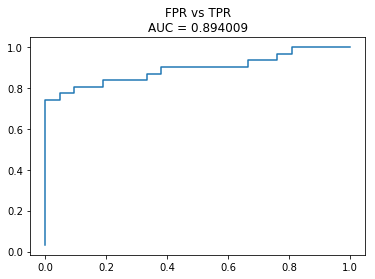

In [106]:
plt.plot(fpr,tpr)
plt.title("FPR vs TPR\nAUC = 0.894009")

plt.show()

In [ ]:
xgb_model = xgb.XGBRegressor(objective="binary:logistic", colsample_bytree=.8609771937961997, gamma=.46202087955371657, learning_rate=.10083495993522129, max_depth=5, n_estimators=2500, subsample=.611)
xgb_model.fit(X_train,y_train)

#all_test_IDs = test_IDs['AD'] + test_IDs['NC']
from sklearn.metrics import roc_auc_score
y_score = xgb_model.predict(X_test)
#yguess = pd.DataFrame(yguess)

score = roc_auc_score(y_test, yguess)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
#metrics.roc_curve(y, scores, pos_label=2)

len(fpr)

plt.plot(fpr,tpr)
plt.title("FPR vs TPR\nAUC = 0.894009")

plt.show()

In [87]:

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

NameError: name 'n_classes' is not defined

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr[2], tpr[2], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[2])

NameError: name 'roc_auc' is not defined

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')